In [63]:
import numpy as np
import matplotlib.pyplot as plt

In [57]:
def SIRSelke(n,m,Q,I,lmb):
    """Function that runs a Sellke construction of a simple SIR model with a constant infectivity"""
    A = 0 
    t = 0
    
    
    t_inf = [0]*(n+m)
    t_recov = [0]*(n+m)

    susceptible_indices = [k for k in range(m,n+m)]
    infected_indices = [k for k in range(m)]
    recovered_indices = []
    
    active_tau = [np.inf]*(n+m)
    
    for k in infected_indices:
        active_tau[k] = I[k]
    

    
    next_recovery_tau = min(active_tau)
    next_recovery_i = active_tau.index(next_recovery_tau)
    
    next_infection_i = m

    while len(infected_indices)>0:
        #Decide whether next event is a recovery or an infection
        A_check = A + (lmb/n)*next_recovery_tau*len(infected_indices)
        #input(A_check)
        
        if A_check<Q[next_infection_i]:
            #print("Recovery")
            #Next event is recovery  
            A += (lmb/n)*next_recovery_tau*len(infected_indices)
            
            t+= next_recovery_tau
            t_recov[next_recovery_i] = t
            active_tau = [tau-next_recovery_tau for tau in active_tau]
            active_tau = [np.inf if tau ==0 else tau for tau in active_tau]
                    
            
            recovered_indices.append(next_recovery_i)
            infected_indices.remove(next_recovery_i)
            
            next_recovery_tau = min(active_tau)
            next_recovery_i = active_tau.index(next_recovery_tau)
            
        else:
            #print("Infection")
            #Next event is an infection
            tau_of_inf = (Q[next_infection_i]-A)/(lmb*len(infected_indices))
            A+= (lmb/n)*tau_of_inf*len(infected_indices)
            
            t+=tau_of_inf
            
            t_inf[next_infection_i] = t
            active_tau = [tau-tau_of_inf for tau in active_tau]
            active_tau[next_infection_i] = I[next_infection_i]
            
            next_recovery_tau = min(active_tau)
            
            infected_indices.append(next_infection_i)
            susceptible_indices.remove(next_infection_i)
            
            next_infection_i += 1

    return(recovered_indices)
            

In [78]:
m = 1
n = 50
I = [1]*n
#I = np.random.exponential(4,n+m)
data = []
lamb = 1.5
for i in range(100000):
    Q_unsorted = np.random.exponential(1,n)
    Q = np.sort(Q_unsorted)
    data.append(len(SIRSelke(n,m,Q,I,lamb)))


(0.0, 0.1)

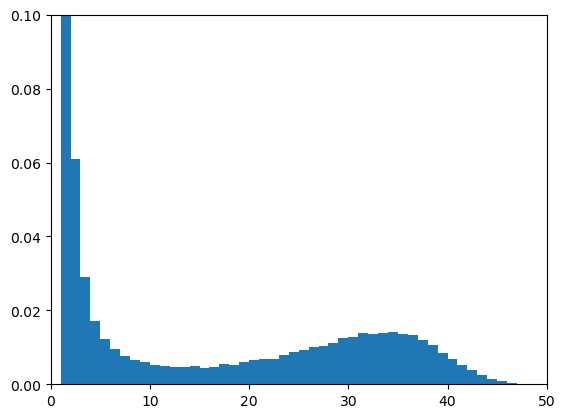

In [80]:
plt.hist(data,bins = np.linspace(0,50,51),density = True)
plt.xlim(0,50)
plt.ylim(0,0.1)